# generate n_bbox to image

dive_fall -> diffusers, segment_anything-1.0


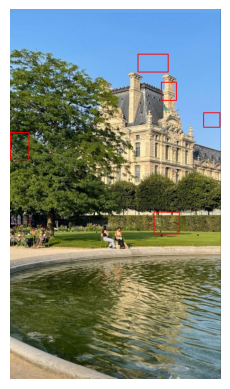

In [10]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# 이미지 불러오기
image = cv2.imread('/Users/kje/Desktop/bbox_text_img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 특정 범위 내 픽셀 값을 포함하는 바운딩 박스 생성 함수
def generate_bboxes_from_points(image, num_points, color_tolerance=30, max_extension=50, min_width=10, min_height=10):
    height, width, _ = image.shape
    bboxes = []

    attempts = 0  # 시도 횟수
    max_attempts = num_points * 5  # 무한 루프 방지를 위한 최대 시도 횟수

    while len(bboxes) < num_points and attempts < max_attempts:
        attempts += 1
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)
        base_color = image[y, x]  # 기준이 될 중심 픽셀의 RGB 값

        # 초기 바운딩 박스 설정
        x1, x2 = x, x
        y1, y2 = y, y

        # 범위 내의 픽셀들만 포함하도록 바운딩 박스 확장
        for dx in range(1, max_extension):
            if x + dx < width and np.all(np.abs(image[y, x + dx] - base_color) <= color_tolerance):
                x2 = x + dx
            if x - dx >= 0 and np.all(np.abs(image[y, x - dx] - base_color) <= color_tolerance):
                x1 = x - dx

        for dy in range(1, max_extension):
            if y + dy < height and np.all(np.abs(image[y + dy, x] - base_color) <= color_tolerance):
                y2 = y + dy
            if y - dy >= 0 and np.all(np.abs(image[y - dy, x] - base_color) <= color_tolerance):
                y1 = y - dy

        # 바운딩 박스 크기 계산
        box_width = x2 - x1
        box_height = y2 - y1

        # 최소 크기 조건 검사
        if box_width >= min_width and box_height >= min_height:
            bboxes.append((x1, y1, x2, y2))

    # 시도 횟수를 초과해도 개수에 도달하지 못한 경우 경고
    if len(bboxes) < num_points:
        print(f"경고: 지정된 시도 내에 {num_points}개의 바운딩 박스를 생성할 수 없습니다. 생성된 개수: {len(bboxes)}")

    return bboxes

# 바운딩 박스 그리기 함수
def draw_bboxes(image, bboxes):
    image_copy = image.copy()
    for (x1, y1, x2, y2) in bboxes:
        cv2.rectangle(image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image_copy

# 랜덤 포인트 생성 및 바운딩 박스 생성
num_points = 5  # 생성할 바운딩 박스 개수
bboxes = generate_bboxes_from_points(image, num_points, color_tolerance=30, max_extension=50, min_width=20, min_height=20)
image_with_bboxes = draw_bboxes(image, bboxes)

# 결과 이미지 시각화
plt.imshow(image_with_bboxes)
plt.axis('off')
plt.show()


### 시간 복잡도 해결 시도

경고: 지정된 시도 내에 5개의 바운딩 박스를 생성할 수 없습니다. 생성된 개수: 1


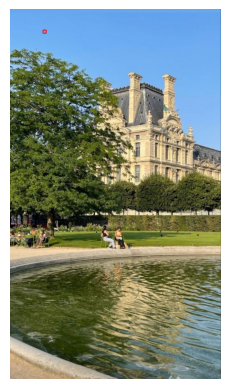

In [8]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# 이미지 불러오기
image = cv2.imread('/Users/kje/Desktop/bbox_text_img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 바운딩 박스 생성 함수
def generate_bboxes_from_points(image, num_points, color_tolerance=30, min_size=10, max_extension=50):
    height, width, _ = image.shape
    bboxes = []

    attempts = 0  # 시도 횟수
    max_attempts = num_points * 5  # 무한 루프 방지를 위한 최대 시도 횟수

    while len(bboxes) < num_points and attempts < max_attempts:
        attempts += 1
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)
        base_color = image[y, x]  # 기준이 될 중심 픽셀의 RGB 값

        # 초기 바운딩 박스 크기를 최소 크기(min_size)로 설정
        bbox_size = min_size

        while bbox_size <= max_extension:
            x1 = max(0, x - bbox_size // 2)
            y1 = max(0, y - bbox_size // 2)
            x2 = min(width - 1, x + bbox_size // 2)
            y2 = min(height - 1, y + bbox_size // 2)

            # 바운딩 박스 내의 모든 픽셀 검사
            region = image[y1:y2 + 1, x1:x2 + 1]  # 바운딩 박스 내 픽셀 영역
            diff = np.abs(region - base_color)

            # 모든 픽셀이 기준 RGB 값 차이 조건(color_tolerance) 만족하면 바운딩 박스 추가
            if np.all(diff <= color_tolerance):
                bboxes.append((x1, y1, x2, y2))
                break  # 바운딩 박스를 추가했으면 확장을 중지

            # 바운딩 박스 크기를 증가시켜 다시 검사
            bbox_size += 5

    # 시도 횟수를 초과해도 개수에 도달하지 못한 경우 경고
    if len(bboxes) < num_points:
        print(f"경고: 지정된 시도 내에 {num_points}개의 바운딩 박스를 생성할 수 없습니다. 생성된 개수: {len(bboxes)}")

    return bboxes

# 바운딩 박스 그리기 함수
def draw_bboxes(image, bboxes):
    image_copy = image.copy()
    for (x1, y1, x2, y2) in bboxes:
        cv2.rectangle(image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image_copy

# 랜덤 포인트 생성 및 바운딩 박스 생성
num_points = 5  # 생성할 바운딩 박스 개수
bboxes = generate_bboxes_from_points(image, num_points, color_tolerance=30, min_size=10, max_extension=50)
image_with_bboxes = draw_bboxes(image, bboxes)

# 결과 이미지 시각화
plt.imshow(image_with_bboxes)
plt.axis('off')
plt.show()


### 겹치는 bbox 해결

In [39]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import math


# 이미지 불러오기
image = cv2.imread('/Users/kje/Desktop/bbox_text_img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 두 점 사이의 거리 계산 함수
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# 중심 픽셀 선택 시 거리 제한 조건 추가
def is_far_enough(x, y, existing_bboxes, min_distance):
    for bbox in existing_bboxes:
        x1, y1, x2, y2 = bbox
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2
        distance = calculate_distance(x, y, center_x, center_y)
        if distance < min_distance:
            return False
    return True

# 바운딩 박스 겹침 여부 확인
def is_overlapping(bbox1, bbox2):
    x1_1, y1_1, x2_1, y2_1 = bbox1
    x1_2, y1_2, x2_2, y2_2 = bbox2

    # 겹치지 않는 경우
    if x1_1 > x2_2 or x1_2 > x2_1:
        return False
    if y1_1 > y2_2 or y1_2 > y2_1:
        return False

    # 겹치는 경우
    return True


# 특정 범위 내 픽셀 값을 포함하는 바운딩 박스 생성 함수
def generate_bboxes_from_points(image, num_points, color_tolerance=30, max_extension=50, min_width=10, min_height=10):
    height, width, _ = image.shape
    bboxes = []

    attempts = 0  # 시도 횟수
    max_attempts = num_points * 5  # 무한 루프 방지를 위한 최대 시도 횟수
    min_distance = max_extension * 2  # 중심 간 최소 거리 설정

    while len(bboxes) < num_points and attempts < max_attempts:
        attempts += 1
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)

        # 거리 조건 추가
        if not is_far_enough(x, y, bboxes, min_distance):
            continue  # 조건을 만족하지 않으면 다른 픽셀로 다시 시도
        
        base_color = image[y, x]  # 기준이 될 중심 픽셀의 RGB 값

        # 초기 바운딩 박스 설정
        x1, x2 = x, x
        y1, y2 = y, y

        # 범위 내의 픽셀들만 포함하도록 바운딩 박스 확장
        for dx in range(1, max_extension):
            if x + dx < width and np.all(np.abs(image[y, x + dx] - base_color) <= color_tolerance):
                x2 = x + dx
            if x - dx >= 0 and np.all(np.abs(image[y, x - dx] - base_color) <= color_tolerance):
                x1 = x - dx

        for dy in range(1, max_extension):
            if y + dy < height and np.all(np.abs(image[y + dy, x] - base_color) <= color_tolerance):
                y2 = y + dy
            if y - dy >= 0 and np.all(np.abs(image[y - dy, x] - base_color) <= color_tolerance):
                y1 = y - dy

        # 바운딩 박스 크기 계산
        box_width = x2 - x1
        box_height = y2 - y1

        # 최소 크기 조건 검사
        if box_width >= min_width and box_height >= min_height:
            new_bbox = (x1, y1, x2, y2)

            # 기존 바운딩 박스와 겹침 여부 확인
            if any(is_overlapping(new_bbox, bbox) for bbox in bboxes):
                continue  # 겹치면 다시 시도

            bboxes.append(new_bbox)

    # 시도 횟수를 초과해도 개수에 도달하지 못한 경우 경고
    if len(bboxes) < num_points:
        print(f"경고: 지정된 시도 내에 {num_points}개의 바운딩 박스를 생성할 수 없습니다. 생성된 개수: {len(bboxes)}")

    return bboxes

# 바운딩 박스 그리기 함수
def draw_bboxes(image, bboxes):
    image_copy = image.copy()
    for (x1, y1, x2, y2) in bboxes:
        cv2.rectangle(image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image_copy

# 랜덤 포인트 생성 및 바운딩 박스 생성
num_points = 5  # 생성할 바운딩 박스 개수
bboxes = generate_bboxes_from_points(image, num_points, color_tolerance=30, max_extension=50, min_width=20, min_height=20)
image_with_bboxes = draw_bboxes(image, bboxes)

# 결과 이미지 시각화
plt.imshow(image_with_bboxes)
plt.axis('off')
plt.show()


NameError: name 'is_overlapping' is not defined

중심거리 max_extension*2

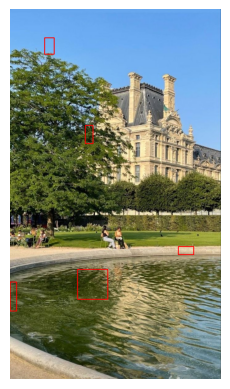

In [97]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# 이미지 불러오기
image = cv2.imread('/Users/kje/Desktop/bbox_text_img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 두 점 사이의 거리 계산 함수
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# 중심 픽셀 선택 시 거리 제한 조건 추가
def is_far_enough(x, y, existing_bboxes, min_distance):
    for bbox in existing_bboxes:
        x1, y1, x2, y2 = bbox
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2
        distance = calculate_distance(x, y, center_x, center_y)
        if distance < min_distance:
            return False
    return True


# 특정 범위 내 픽셀 값을 포함하는 바운딩 박스 생성 함수
def generate_bboxes_from_points(image, num_points, color_tolerance=30, max_extension=50, min_width=10, min_height=10):
    height, width, _ = image.shape
    bboxes = []

    attempts = 0  # 시도 횟수
    max_attempts = num_points * 5  # 무한 루프 방지를 위한 최대 시도 횟수
    min_distance = max_extension * 2  # 중심 간 최소 거리 설정

    while len(bboxes) < num_points and attempts < max_attempts:
        attempts += 1
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)

        # 거리 조건 추가
        if not is_far_enough(x, y, bboxes, min_distance):
            continue  # 조건을 만족하지 않으면 다른 픽셀로 다시 시도
        
        base_color = image[y, x]  # 기준이 될 중심 픽셀의 RGB 값

        # 초기 바운딩 박스 설정
        x1, x2 = x, x
        y1, y2 = y, y

        # 범위 내의 픽셀들만 포함하도록 바운딩 박스 확장
        for dx in range(1, max_extension):
            if x + dx < width and np.all(np.abs(image[y, x + dx] - base_color) <= color_tolerance):
                x2 = x + dx
            if x - dx >= 0 and np.all(np.abs(image[y, x - dx] - base_color) <= color_tolerance):
                x1 = x - dx

        for dy in range(1, max_extension):
            if y + dy < height and np.all(np.abs(image[y + dy, x] - base_color) <= color_tolerance):
                y2 = y + dy
            if y - dy >= 0 and np.all(np.abs(image[y - dy, x] - base_color) <= color_tolerance):
                y1 = y - dy

        # 바운딩 박스 크기 계산
        box_width = x2 - x1
        box_height = y2 - y1

        # 최소 크기 조건 검사
        if box_width >= min_width and box_height >= min_height:
            bboxes.append((x1, y1, x2, y2))

    # 시도 횟수를 초과해도 개수에 도달하지 못한 경우 경고
    if len(bboxes) < num_points:
        print(f"경고: 지정된 시도 내에 {num_points}개의 바운딩 박스를 생성할 수 없습니다. 생성된 개수: {len(bboxes)}")

    return bboxes

# 바운딩 박스 그리기 함수
def draw_bboxes(image, bboxes):
    image_copy = image.copy()
    for (x1, y1, x2, y2) in bboxes:
        cv2.rectangle(image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image_copy

# 랜덤 포인트 생성 및 바운딩 박스 생성
num_points = 5  # 생성할 바운딩 박스 개수
bboxes = generate_bboxes_from_points(image, num_points, color_tolerance=30, max_extension=50, min_width=20, min_height=20)
image_with_bboxes = draw_bboxes(image, bboxes)

# 결과 이미지 시각화
plt.imshow(image_with_bboxes)
plt.axis('off')
plt.show()
